# Junioraufgabe: Quadratisch Praktisch Grün

### Team-ID: 12345

### Team-Name: MyTeam

### Bearbeiter/-innen dieser Aufgabe: Lena Müller, Malte Riedberg

Datum: 23.04.2025

### Lösungsidee

Die Anzahl der Grundstücke muss mindestens so groß sein wie die Zahl der Interessenten. Sie darf aber nicht größer sein als 

In [37]:
spiele = [0, 0, 0, 0, 1, 1, 1, 1, 2, 2]

Jede Wundertüte ist für uns ebenfalls eine Liste. Wir erzeugen zunächst soviel leere Listen wie es Wundertüten gibt. Dann gehen wir schrittweise durch die spiele-Liste und verteilen die Spiele nacheinander in unsere Wundertüten. Wenn wir an der letzten Wundertüte angekommen sind, fangen wir wieder bei der ersten an. 

<div style="page-break-after: always;"></div>

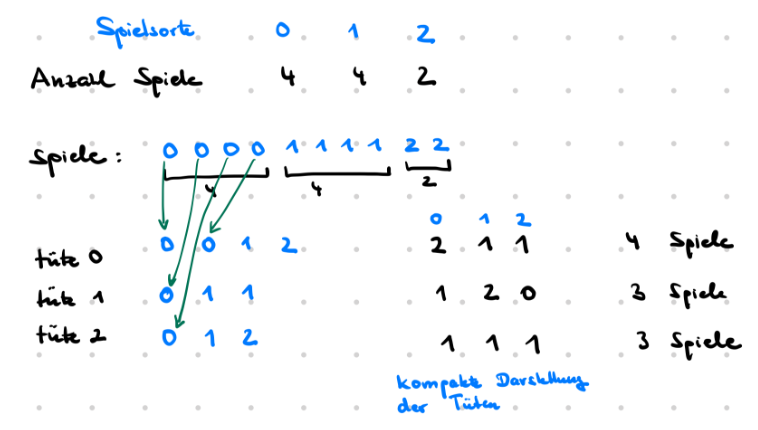

In [47]:
from IPython.display import Image, display              # damit das Bild bei print erscheint
display(Image(filename='tuete1.png', width=600))

So erreichen wir, dass die Anzahl der Spiele sich in den Wundertüten höchstens um 1 unterscheidet. Da wir die Spiele sortenweise verteilen erreichen wir auch, dass sich die Anzahl der Spiele pro Sorte höchstens um 1 unterscheidet: Wenn in eine Wundertüte ein zweites Spiel derselben Sorte kommt, muss nach unserem Verfahren jede andere Tüte dieses Spiel mindestens einmal enthalten. 




<div style="page-break-after: always;"></div>

### Umsetzung

Die Lösungsidee wird in ein Programm der Sprache Python umgesetzt. Zunächst lesen wir die Daten der Eingabe ein. In der Liste *spiele_pro_sorte* speichern wir die Anzahl der Spiele für jede Sorte.

In [39]:
eingabe = 'wundertuete0.txt'
print(f'Beispieldatei: {eingabe}')
f = open(eingabe)
anzahl_tueten = int(f.readline())
anzahl_sorten = int(f.readline())
spiele_pro_sorte = []
for _ in range(anzahl_sorten):
    spiele_pro_sorte.append(int(f.readline()))
f.close()
print(f'Anzahl Wundertüten: {anzahl_tueten}')
print(f'Anzahl Spielesorten: {anzahl_sorten}')
print(f'Anzahl Spiele pro Sorte: {spiele_pro_sorte}')

Beispieldatei: wundertuete0.txt
Anzahl Wundertüten: 3
Anzahl Spielesorten: 3
Anzahl Spiele pro Sorte: [4, 4, 2]


Die Gesamtheit der zu verteilenden Spiele modellieren wir als eine Liste. Eine Zahl k steht für ein Spiel der Sorte k.  

In [40]:
spiele = []
for i in range(len(spiele_pro_sorte)):
    for k in range(spiele_pro_sorte[i]):
        spiele.append(i)
print(spiele)

[0, 0, 0, 0, 1, 1, 1, 1, 2, 2]



<div style="page-break-after: always;"></div>

Jede Wundertüte modellieren wir als eine Liste. Alle Wundertüten sammeln wir in der Liste *tueten*. Zu Beginn sind alle Wundertüten leer.

In [41]:
tueten = [[] for i in range(anzahl_tueten)]              # Liste mit leeren Wundertüten            
print(tueten)

[[], [], []]


Dann verteilen wir die Spiele in die Wundertüten. Solange in unserer Liste spiele noch was ist, holen wir uns das erste Element heraus, und packen es in die Tuete mit dem Index *nr*. Mit dem Modulo-Operator erreichen wir, dass *nr* wieder bei 0 anfängt, wenn die letzte Tüte befüllt worden ist.

In [42]:
nr = 0           # Nummer der Wundertüte, in die als nächstes was reinkommt
while spiele:
    x = spiele.pop(0)
    tueten[nr].append(x)
    nr = (nr + 1) % anzahl_tueten
    
print(tueten)

[[0, 0, 1, 2], [0, 1, 1], [0, 1, 2]]



<div style="page-break-after: always;"></div>

Die Funktion *kompakt* stellt die Wundertüten kompakter dar, indem wir für jede Spielesorte angeben, wieviele Spiele dieser Sorte in der Tüte sind.


In [43]:
def kompakt(tuete):
    anzahlen = [0]*anzahl_sorten
    for x in tuete:
        anzahlen[x]+=1
    return anzahlen
    
print(kompakt([0,0,1,2]))

[2, 1, 1]


Wir stellen alle Wundertüten kompakt dar und geben das Ergebnis aus.

In [44]:
tueten1 = []
for t in tueten:
    tueten1.append(kompakt(t))

print('Inhalte der Wundertüten:')
for i in range(anzahl_tueten):
    print(f'{i+1} : {tueten1[i]} - {sum(tueten1[i])} Spiele')  

Inhalte der Wundertüten:
1 : [2, 1, 1] - 4 Spiele
2 : [1, 2, 0] - 3 Spiele
3 : [1, 1, 1] - 3 Spiele



<div style="page-break-after: always;"></div>

### Beispiele

Unser Programm liefert für die Beispieldaten folgende Ergebnisse:

    Beispieldatei: wundertuete0.txt
    Anzahl Wundertüten: 3
    Anzahl Spielesorten: 3
    Anzahl Spiele pro Sorte: [4, 4, 2]
    Inhalte der Wundertüten:
     1 : [2, 1, 1] - 4 Spiele
     2 : [1, 2, 0] - 3 Spiele
     3 : [1, 1, 1] - 3 Spiele


    Beispieldatei: wundertuete1.txt
    Anzahl Wundertüten: 6
    Anzahl Spielesorten: 3
    Anzahl Spiele pro Sorte: [18, 6, 12]
    Inhalte der Wundertüten:
     1 : [3, 1, 2] - 6 Spiele
     2 : [3, 1, 2] - 6 Spiele
     3 : [3, 1, 2] - 6 Spiele
     4 : [3, 1, 2] - 6 Spiele
     5 : [3, 1, 2] - 6 Spiele
     6 : [3, 1, 2] - 6 Spiele

    Beispieldatei: wundertuete2.txt
    Anzahl Wundertüten: 9
    Anzahl Spielesorten: 4
    Anzahl Spiele pro Sorte: [10, 9, 3, 5]
    Inhalte der Wundertüten:
     1 : [2, 1, 0, 0] - 3 Spiele
     2 : [1, 1, 1, 0] - 3 Spiele
     3 : [1, 1, 1, 0] - 3 Spiele
     4 : [1, 1, 1, 0] - 3 Spiele
     5 : [1, 1, 0, 1] - 3 Spiele
     6 : [1, 1, 0, 1] - 3 Spiele
     7 : [1, 1, 0, 1] - 3 Spiele
     8 : [1, 1, 0, 1] - 3 Spiele
     9 : [1, 1, 0, 1] - 3 Spiele

    Beispieldatei: wundertuete3.txt
    Anzahl Wundertüten: 11
    Anzahl Spielesorten: 5
    Anzahl Spiele pro Sorte: [2, 11, 6, 2, 1]
    Inhalte der Wundertüten:
     1 : [1, 1, 0, 0, 0] - 2 Spiele
     2 : [1, 1, 0, 0, 0] - 2 Spiele
     3 : [0, 1, 1, 0, 0] - 2 Spiele
     4 : [0, 1, 1, 0, 0] - 2 Spiele
     5 : [0, 1, 1, 0, 0] - 2 Spiele
     6 : [0, 1, 1, 0, 0] - 2 Spiele
     7 : [0, 1, 1, 0, 0] - 2 Spiele
     8 : [0, 1, 1, 0, 0] - 2 Spiele
     9 : [0, 1, 0, 1, 0] - 2 Spiele
    10 : [0, 1, 0, 1, 0] - 2 Spiele
    11 : [0, 1, 0, 0, 1] - 2 Spiele

    Beispieldatei: wundertuete4.txt
    Anzahl Wundertüten: 17
    Anzahl Spielesorten: 6
    Anzahl Spiele pro Sorte: [21, 114, 38, 97, 513, 89]
    Inhalte der Wundertüten:
     1 : [2, 6, 3, 5, 31, 5] - 52 Spiele
     2 : [2, 6, 3, 5, 30, 6] - 52 Spiele
     3 : [2, 6, 3, 5, 30, 6] - 52 Spiele
     4 : [2, 6, 2, 6, 30, 6] - 52 Spiele
     5 : [1, 7, 2, 6, 30, 6] - 52 Spiele
     6 : [1, 7, 2, 6, 30, 5] - 51 Spiele
     7 : [1, 7, 2, 6, 30, 5] - 51 Spiele
     8 : [1, 7, 2, 6, 30, 5] - 51 Spiele
     9 : [1, 7, 2, 6, 30, 5] - 51 Spiele
    10 : [1, 7, 2, 6, 30, 5] - 51 Spiele
    11 : [1, 7, 2, 6, 30, 5] - 51 Spiele
    12 : [1, 7, 2, 6, 30, 5] - 51 Spiele
    13 : [1, 7, 2, 6, 30, 5] - 51 Spiele
    14 : [1, 7, 2, 6, 30, 5] - 51 Spiele
    15 : [1, 7, 2, 6, 30, 5] - 51 Spiele
    16 : [1, 7, 2, 5, 31, 5] - 51 Spiele
    17 : [1, 6, 3, 5, 31, 5] - 51 Spiele

    Beispieldatei: wundertuete5.txt
    Anzahl Wundertüten: 97
    Anzahl Spielesorten: 23
    Anzahl Spiele pro Sorte: [50, 41, 163, 124, 113, 83, 129, 65, 70, 56, 127, 83, 24, 69, 182, 174, 76, 106, 92, 155, 29, 133, 121]
    Inhalte der Wundertüten:
     1 : [1, 0, 2, 1, 2, 0, 2, 0, 1, 1, 1, 1, 0, 1, 2, 2, 0, 1, 1, 2, 0, 2, 1] - 24 Spiele
     2 : [1, 0, 2, 1, 2, 0, 2, 0, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 2, 0, 2, 1] - 24 Spiele
     3 : [1, 0, 2, 1, 2, 0, 2, 0, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 2, 0, 2, 1] - 24 Spiele
     4 : [1, 0, 2, 1, 2, 0, 2, 0, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 2, 0, 2, 1] - 24 Spiele
     5 : [1, 0, 2, 1, 2, 0, 2, 0, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 2, 0, 2, 1] - 24 Spiele
     6 : [1, 0, 2, 1, 2, 0, 2, 0, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 2, 0, 2, 1] - 24 Spiele
     7 : [1, 0, 2, 1, 1, 1, 2, 0, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 2, 0, 2, 1] - 24 Spiele
     8 : [1, 0, 2, 1, 1, 1, 2, 0, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 2, 0, 2, 1] - 24 Spiele
     9 : [1, 0, 2, 1, 1, 1, 2, 0, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 2, 0, 2, 1] - 24 Spiele
    10 : [1, 0, 2, 1, 1, 1, 2, 0, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 2, 0, 2, 1] - 24 Spiele
    11 : [1, 0, 2, 1, 1, 1, 2, 0, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 2, 0, 1, 2] - 24 Spiele
    12 : [1, 0, 2, 1, 1, 1, 2, 0, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 2, 0, 1, 2] - 24 Spiele
    13 : [1, 0, 2, 1, 1, 1, 2, 0, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 2, 0, 1, 2] - 24 Spiele
    14 : [1, 0, 2, 1, 1, 1, 2, 0, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 2, 0, 1, 2] - 24 Spiele
    15 : [1, 0, 2, 1, 1, 1, 2, 0, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 2, 0, 1, 2] - 24 Spiele
    16 : [1, 0, 2, 1, 1, 1, 2, 0, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 2, 0, 1, 2] - 24 Spiele
    17 : [1, 0, 2, 1, 1, 1, 2, 0, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 2, 0, 1, 2] - 24 Spiele
    18 : [1, 0, 2, 1, 1, 1, 2, 0, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 2, 0, 1, 2] - 24 Spiele
    19 : [1, 0, 2, 1, 1, 1, 2, 0, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 2, 0, 1, 2] - 24 Spiele
    20 : [1, 0, 2, 1, 1, 1, 2, 0, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 2, 0, 1, 2] - 24 Spiele
    21 : [1, 0, 2, 1, 1, 1, 2, 0, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 2, 0, 1, 2] - 24 Spiele
    22 : [1, 0, 2, 1, 1, 1, 2, 0, 1, 0, 2, 1, 0, 1, 1, 2, 1, 1, 1, 2, 0, 1, 2] - 24 Spiele
    23 : [1, 0, 2, 1, 1, 1, 2, 0, 1, 0, 2, 1, 0, 1, 1, 2, 1, 1, 1, 2, 0, 1, 2] - 24 Spiele
    24 : [1, 0, 2, 1, 1, 1, 2, 0, 1, 0, 2, 1, 0, 1, 1, 2, 1, 1, 1, 2, 0, 1, 2] - 24 Spiele
    25 : [1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 1, 1, 2, 1, 1, 1, 2, 0, 1, 2] - 24 Spiele
    26 : [1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 1, 1, 2, 1, 1, 1, 2, 0, 1, 2] - 24 Spiele
    27 : [1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 1, 1, 2, 1, 1, 1, 2, 0, 1, 2] - 24 Spiele
    28 : [1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 1, 1, 2, 1, 1, 1, 2, 0, 1, 2] - 24 Spiele
    29 : [1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 1, 1, 2, 1, 1, 1, 2, 0, 1, 2] - 24 Spiele
    30 : [1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 1, 1, 2, 1, 1, 1, 2, 0, 1, 2] - 24 Spiele
    31 : [1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 1, 1, 2, 1, 1, 1, 2, 0, 1, 2] - 24 Spiele
    32 : [1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 1, 1, 2, 1, 1, 1, 2, 0, 1, 2] - 24 Spiele
    33 : [1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 1, 1, 2, 1, 1, 1, 2, 0, 1, 2] - 24 Spiele
    34 : [1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 0, 2, 2, 1, 1, 1, 2, 0, 1, 2] - 24 Spiele
    35 : [1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 0, 2, 2, 1, 1, 1, 2, 0, 1, 1] - 23 Spiele
    36 : [1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 0, 2, 2, 1, 1, 1, 2, 0, 1, 1] - 23 Spiele
    37 : [1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 0, 2, 2, 1, 1, 1, 2, 0, 1, 1] - 23 Spiele
    38 : [1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 2, 2, 1, 1, 1, 2, 0, 1, 1] - 23 Spiele
    39 : [1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 2, 2, 1, 1, 1, 2, 0, 1, 1] - 23 Spiele
    40 : [1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 2, 2, 1, 1, 1, 2, 0, 1, 1] - 23 Spiele
    41 : [1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 2, 2, 1, 1, 1, 2, 0, 1, 1] - 23 Spiele
    42 : [1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 2, 2, 1, 1, 1, 2, 0, 1, 1] - 23 Spiele
    43 : [1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1] - 23 Spiele
    44 : [1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1] - 23 Spiele
    45 : [1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1] - 23 Spiele
    46 : [1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1] - 23 Spiele
    47 : [1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1] - 23 Spiele
    48 : [1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1] - 23 Spiele
    49 : [1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1] - 23 Spiele
    50 : [1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1] - 23 Spiele
    51 : [0, 1, 2, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1] - 23 Spiele
    52 : [0, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1] - 23 Spiele
    53 : [0, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1] - 23 Spiele
    54 : [0, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1] - 23 Spiele
    55 : [0, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1] - 23 Spiele
    56 : [0, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1] - 23 Spiele
    57 : [0, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1] - 23 Spiele
    58 : [0, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1] - 23 Spiele
    59 : [0, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1] - 23 Spiele
    60 : [0, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1] - 23 Spiele
    61 : [0, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1] - 23 Spiele
    62 : [0, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1] - 23 Spiele
    63 : [0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1] - 23 Spiele
    64 : [0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1] - 23 Spiele
    65 : [0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1] - 23 Spiele
    66 : [0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1] - 23 Spiele
    67 : [0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1] - 23 Spiele
    68 : [0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1] - 23 Spiele
    69 : [0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1] - 23 Spiele
    70 : [0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1] - 23 Spiele
    71 : [0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1] - 23 Spiele
    72 : [0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 2, 2, 1, 1, 1, 1, 0, 2, 1] - 23 Spiele
    73 : [0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 2, 2, 1, 1, 1, 1, 0, 2, 1] - 23 Spiele
    74 : [0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 2, 2, 1, 1, 1, 1, 0, 2, 1] - 23 Spiele
    75 : [0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 2, 2, 1, 1, 1, 1, 0, 2, 1] - 23 Spiele
    76 : [0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 2, 2, 1, 1, 1, 1, 0, 2, 1] - 23 Spiele
    77 : [0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 2, 2, 1, 1, 1, 1, 0, 2, 1] - 23 Spiele
    78 : [0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 2, 2, 0, 2, 1, 1, 0, 2, 1] - 23 Spiele
    79 : [0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 2, 2, 0, 2, 1, 1, 0, 2, 1] - 23 Spiele
    80 : [0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 2, 2, 0, 2, 1, 1, 0, 2, 1] - 23 Spiele
    81 : [0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 2, 2, 0, 2, 1, 1, 0, 2, 1] - 23 Spiele
    82 : [0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 2, 2, 0, 2, 0, 2, 0, 2, 1] - 23 Spiele
    83 : [0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 2, 2, 0, 2, 0, 2, 0, 2, 1] - 23 Spiele
    84 : [0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 2, 2, 0, 2, 0, 2, 0, 2, 1] - 23 Spiele
    85 : [0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 2, 2, 0, 2, 0, 2, 0, 2, 1] - 23 Spiele
    86 : [0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 2, 2, 0, 2, 0, 2, 0, 2, 1] - 23 Spiele
    87 : [0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 2, 2, 0, 1, 1, 2, 0, 2, 1] - 23 Spiele
    88 : [0, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 0, 1, 2, 2, 0, 1, 1, 2, 0, 2, 1] - 23 Spiele
    89 : [0, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 0, 1, 2, 2, 0, 1, 1, 2, 0, 2, 1] - 23 Spiele
    90 : [0, 1, 1, 1, 2, 0, 2, 0, 1, 1, 1, 1, 0, 1, 2, 2, 0, 1, 1, 2, 0, 2, 1] - 23 Spiele
    91 : [0, 1, 1, 1, 2, 0, 2, 0, 1, 1, 1, 1, 0, 1, 2, 2, 0, 1, 1, 2, 0, 2, 1] - 23 Spiele
    92 : [0, 0, 2, 1, 2, 0, 2, 0, 1, 1, 1, 1, 0, 1, 2, 2, 0, 1, 1, 2, 0, 2, 1] - 23 Spiele
    93 : [0, 0, 2, 1, 2, 0, 2, 0, 1, 1, 1, 1, 0, 1, 2, 2, 0, 1, 1, 2, 0, 2, 1] - 23 Spiele
    94 : [0, 0, 2, 1, 2, 0, 2, 0, 1, 1, 1, 1, 0, 1, 2, 2, 0, 1, 1, 2, 0, 2, 1] - 23 Spiele
    95 : [0, 0, 2, 1, 2, 0, 2, 0, 1, 1, 1, 1, 0, 1, 2, 2, 0, 1, 1, 2, 0, 2, 1] - 23 Spiele
    96 : [0, 0, 2, 1, 2, 0, 2, 0, 1, 1, 1, 1, 0, 1, 2, 2, 0, 1, 1, 2, 0, 2, 1] - 23 Spiele
    97 : [0, 0, 2, 1, 2, 0, 2, 0, 1, 1, 1, 1, 0, 1, 2, 2, 0, 1, 1, 2, 0, 2, 1] - 23 Spiele

<div style="page-break-after: always;"></div>

### Quellcode

In [ ]:
def kompakt(tuete):
    anzahlen = [0]*anzahl_sorten
    for x in tuete:
        anzahlen[x]+=1
    return anzahlen

eingabe = 'wundertuete5.txt'
print(f'Beispieldatei: {eingabe}')
f = open(eingabe)
anzahl_tueten = int(f.readline())
anzahl_sorten = int(f.readline())
spiele_pro_sorte = []
for _ in range(anzahl_sorten):
    spiele_pro_sorte.append(int(f.readline()))
f.close()
print(f'Anzahl Wundertüten: {anzahl_tueten}')
print(f'Anzahl Spielesorten: {anzahl_sorten}')
print(f'Anzahl Spiele pro Sorte: {spiele_pro_sorte}')

spiele = []
for i in range(len(spiele_pro_sorte)):
    for k in range(spiele_pro_sorte[i]):
        spiele.append(i)

tueten = [[] for i in range(anzahl_tueten)]  
nr = 0           # Nummer der Wundertüte, in die als nächstes was reinkommt
while spiele:
    x = spiele.pop(0)
    tueten[nr].append(x)
    nr = (nr + 1) % anzahl_tueten
    
tueten1 = []
for t in tueten:
    tueten1.append(kompakt(t))

print('Inhalte der Wundertüten:')
for i in range(anzahl_tueten):
    print(f'{i+1:2} : {tueten1[i]} - {sum(tueten1[i])} Spiele')  